<a href="https://colab.research.google.com/github/muthiawidya/Try-Machine-Learning/blob/main/credit_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = 'drive/My Drive/Colab Notebook/datacredit.csv'
dataset = pd.read_csv(data_path)

In [ ]:
dataset.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
dataset.isnull().sum().sort_values(ascending=False).head()

In [ ]:
dataset.loc[(dataset['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=dataset['MINIMUM_PAYMENTS'].mean()
dataset.loc[(dataset['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=dataset['CREDIT_LIMIT'].mean()

dataset.isnull().sum().sort_values(ascending=False).head()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

df = pd.DataFrame(scaled_data, columns = dataset.columns)
df.head()

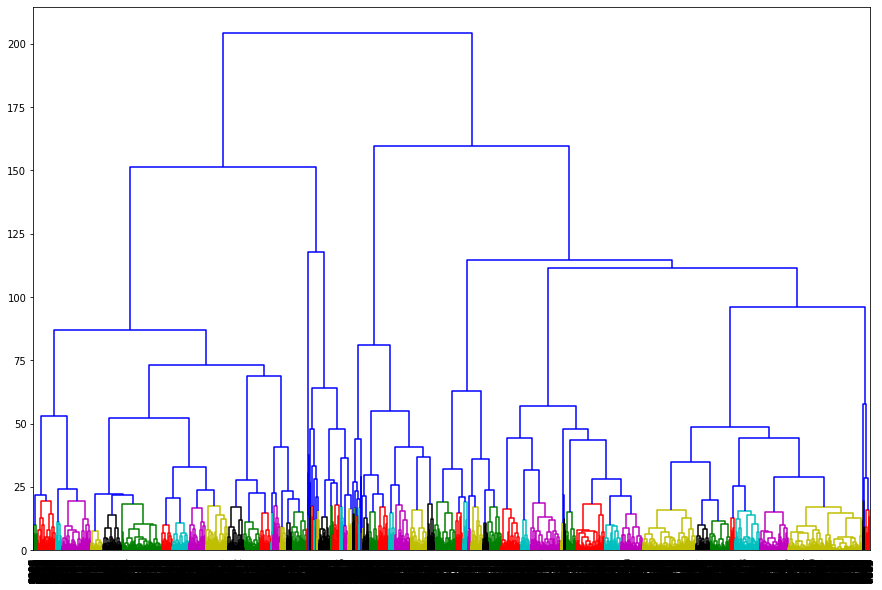

In [ ]:
plt.figure(figsize=(15,10))
dendrogram(linkage(df,method="ward"), leaf_rotation=90, p=5, color_threshold=20,leaf_font_size=10, truncate_mode='none')
plt.show()


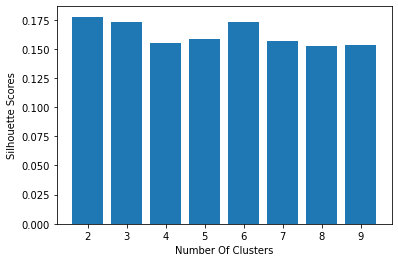

In [ ]:
silhouette_scores=[]

for n_cluster in range(2,10): silhouette_scores.append(
    silhouette_score(df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df)))

plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number Of Clusters',fontsize = 10)
plt.ylabel('Silhouette Scores',fontsize = 10)
plt.show()


In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(df)
labels=agglo.labels_
hasil_agglo=pd.concat([df,pd.DataFrame({'cluster':labels})], axis=1)
hasil_agglo.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,1
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,2
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.36068,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,1
